The famous MNIST Dataset is used for the purpose of Handwritten Digit Recognition. The train and test sets are downloaded from Kaggle. We started with preprocessing the data and then used 4 Machine Learning classifiers: 
- SVM
- Random Forest
- Logistic Regression 
- XGBoost

with and without dimensionality reduction method (PCA). 
For each of the classifier, accuracy (both on validation set and training set) and training time are calculated, along with the confusion matrix (for validation set). In a separate notebook, we will use Convolutional Neural Network (using Keras) to train the same dataset and obtain the results.

80% of the original train set (as provided in the Kaggle site) is used for training the models and the rest is used as validation set. The validation set is used for the purpose of model evaluation. The test set is used for predicting the labels for each of the sample. We have also shown the predicted label for the first 100 test samples.

For the purpose of dimensionality reduction, PCA is used with variance 95%. We have plotted a **Expected Variance Ratio (Cumulative) vs. No. of components** graph and reconstructed digit images after applying PCA with different percentage of variance (50%, 75%, 95%).

Both the train and test sets are normalized (divided by 255) to represent the pixels in the range 0-1. 

The models are run in Windows 10 operating system, processor Intel(R)Core(TM)i5-7200U CPU @ 2.50GHz 2.71 GHz and 8.00GB RAM



## TABLE OF CONTENTS

1. [DATA PREPROCESSING](#DATA-PREPROCESSING)
2. [PRINCIPAL COMPONENT ANALYSIS](#PRINCIPAL-COMPONENT-ANALYSIS)
3. [SUPPORT VECTOR MACHINES](#SUPPORT-VECTOR-MACHINES)
4. [RANDOM FOREST CLASSIFIER](#RANDOM-FOREST-CLASSIFIER)
5. [LOGISTIC REGRESSION CLASSIFIER](#LOGISTIC-REGRESSION-CLASSIFIER)
6. [XGBoost](#XGBoost)
7. [MODEL EVALUATION](#MODEL-EVALUATION)

## DATA PREPROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import metrics
import time
import datetime as dt

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


It can be seen that the train and the test set contain 784 features (pixels)

In [8]:
x_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
x_test = test.values

We are looking for bias in the dataset towards a particular digit. The barplot below shows that though the number of digits are almost equal, it is slightly biased towards digit 1. 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

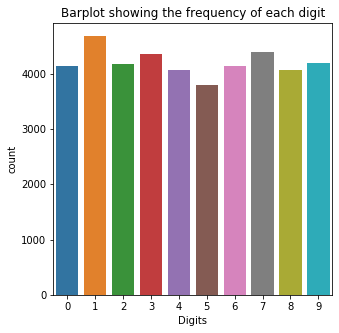

In [9]:
fig = plt.figure(figsize=(5,5))
sns.countplot(y_train)
plt.xlabel('Digits')
plt.title('Barplot showing the frequency of each digit')
plt.tight_layout

#### MNIST Dataset

Displaying the first 100 images of the dataset

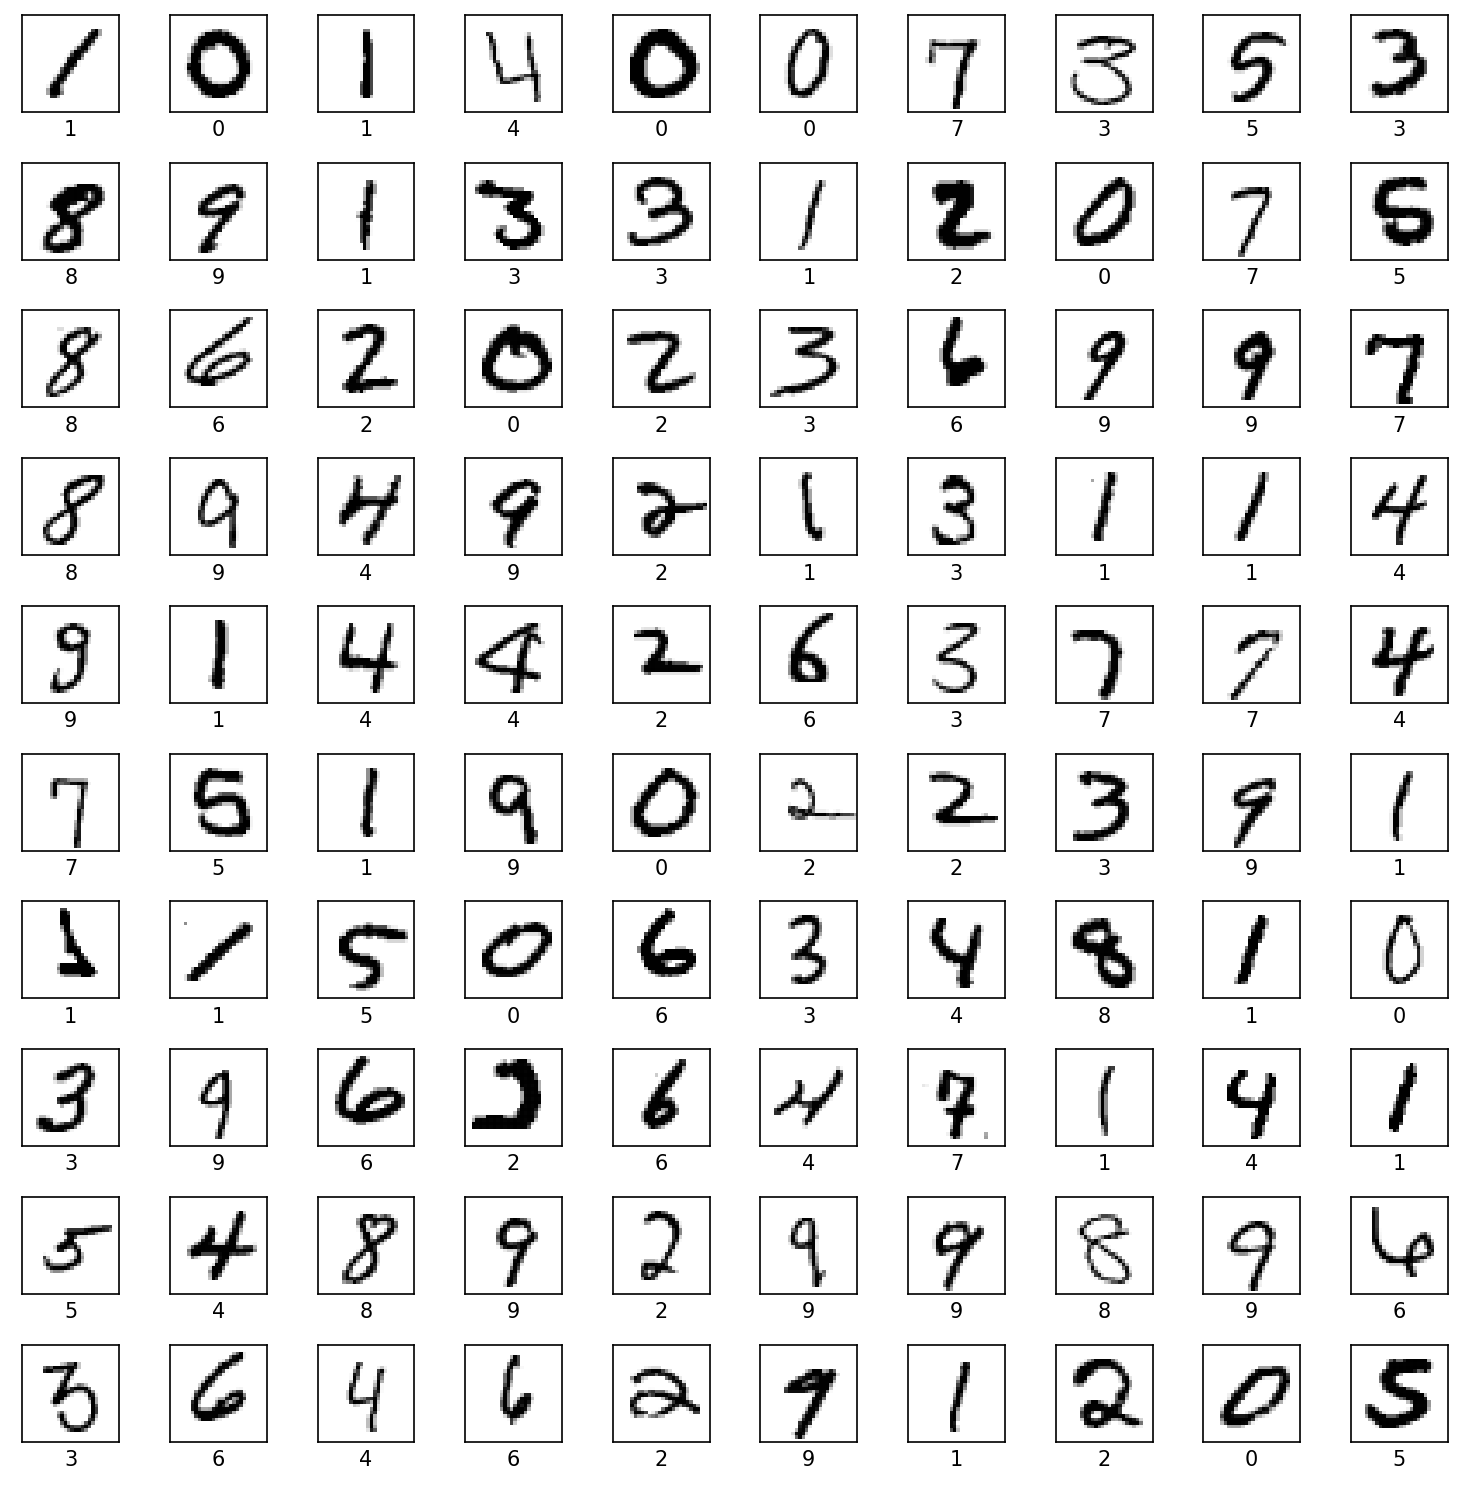

In [10]:
fig, ax = plt.subplots(10, 10, figsize=(10,10), dpi=150)

for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_train[i])
    axi.set(xticks=[], yticks=[])

plt.tight_layout()


Normalization of the train and test sets

In [11]:
x_train = x_train/255
x_test = x_test/255

Splitting the original training set into a training set and a validation set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                   test_size=0.2, random_state=0)

## PRINCIPAL COMPONENT ANALYSIS

We will apply PCA to the *x_train*. First we will consider 2 components and plot the data. This will serve our visualization purpose. Then we will plot a *Explained Variance Ratio vs. No. of components* graph to understand how the number of components affect the variance and how many components are safer to consider for our subsequent work. This will be followed by analysis of PCA with 50%, 75% and 95% variance on our data. We will use *Inverse Transform* function of PCA to reconstruct few images after application of PCA. This will give us an idea about how much information could be recovered. Then, finally we will stick to a particular variance % (95 in our case) and PCA will applied to both the *x_val* and *x_test* and these sets will be used on various Machine Learning Models. 

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

The scatterplot shows the projection of 784 dimensional *x_train* dataset into 2 dimensions (or components) that describes the highest variance. Along these 2 components we can obtain the highest variance. PCA is an unsupervised learning algorithm that helped us to visualize a high dimensional dataset in 2 dimensions without lossing much information, i.e., if we choose some other axes, we can't obtain enough information compared to what we are obtaining now. PCA (if used for 2 components) presents those 2 axes that describe the highest variance. 

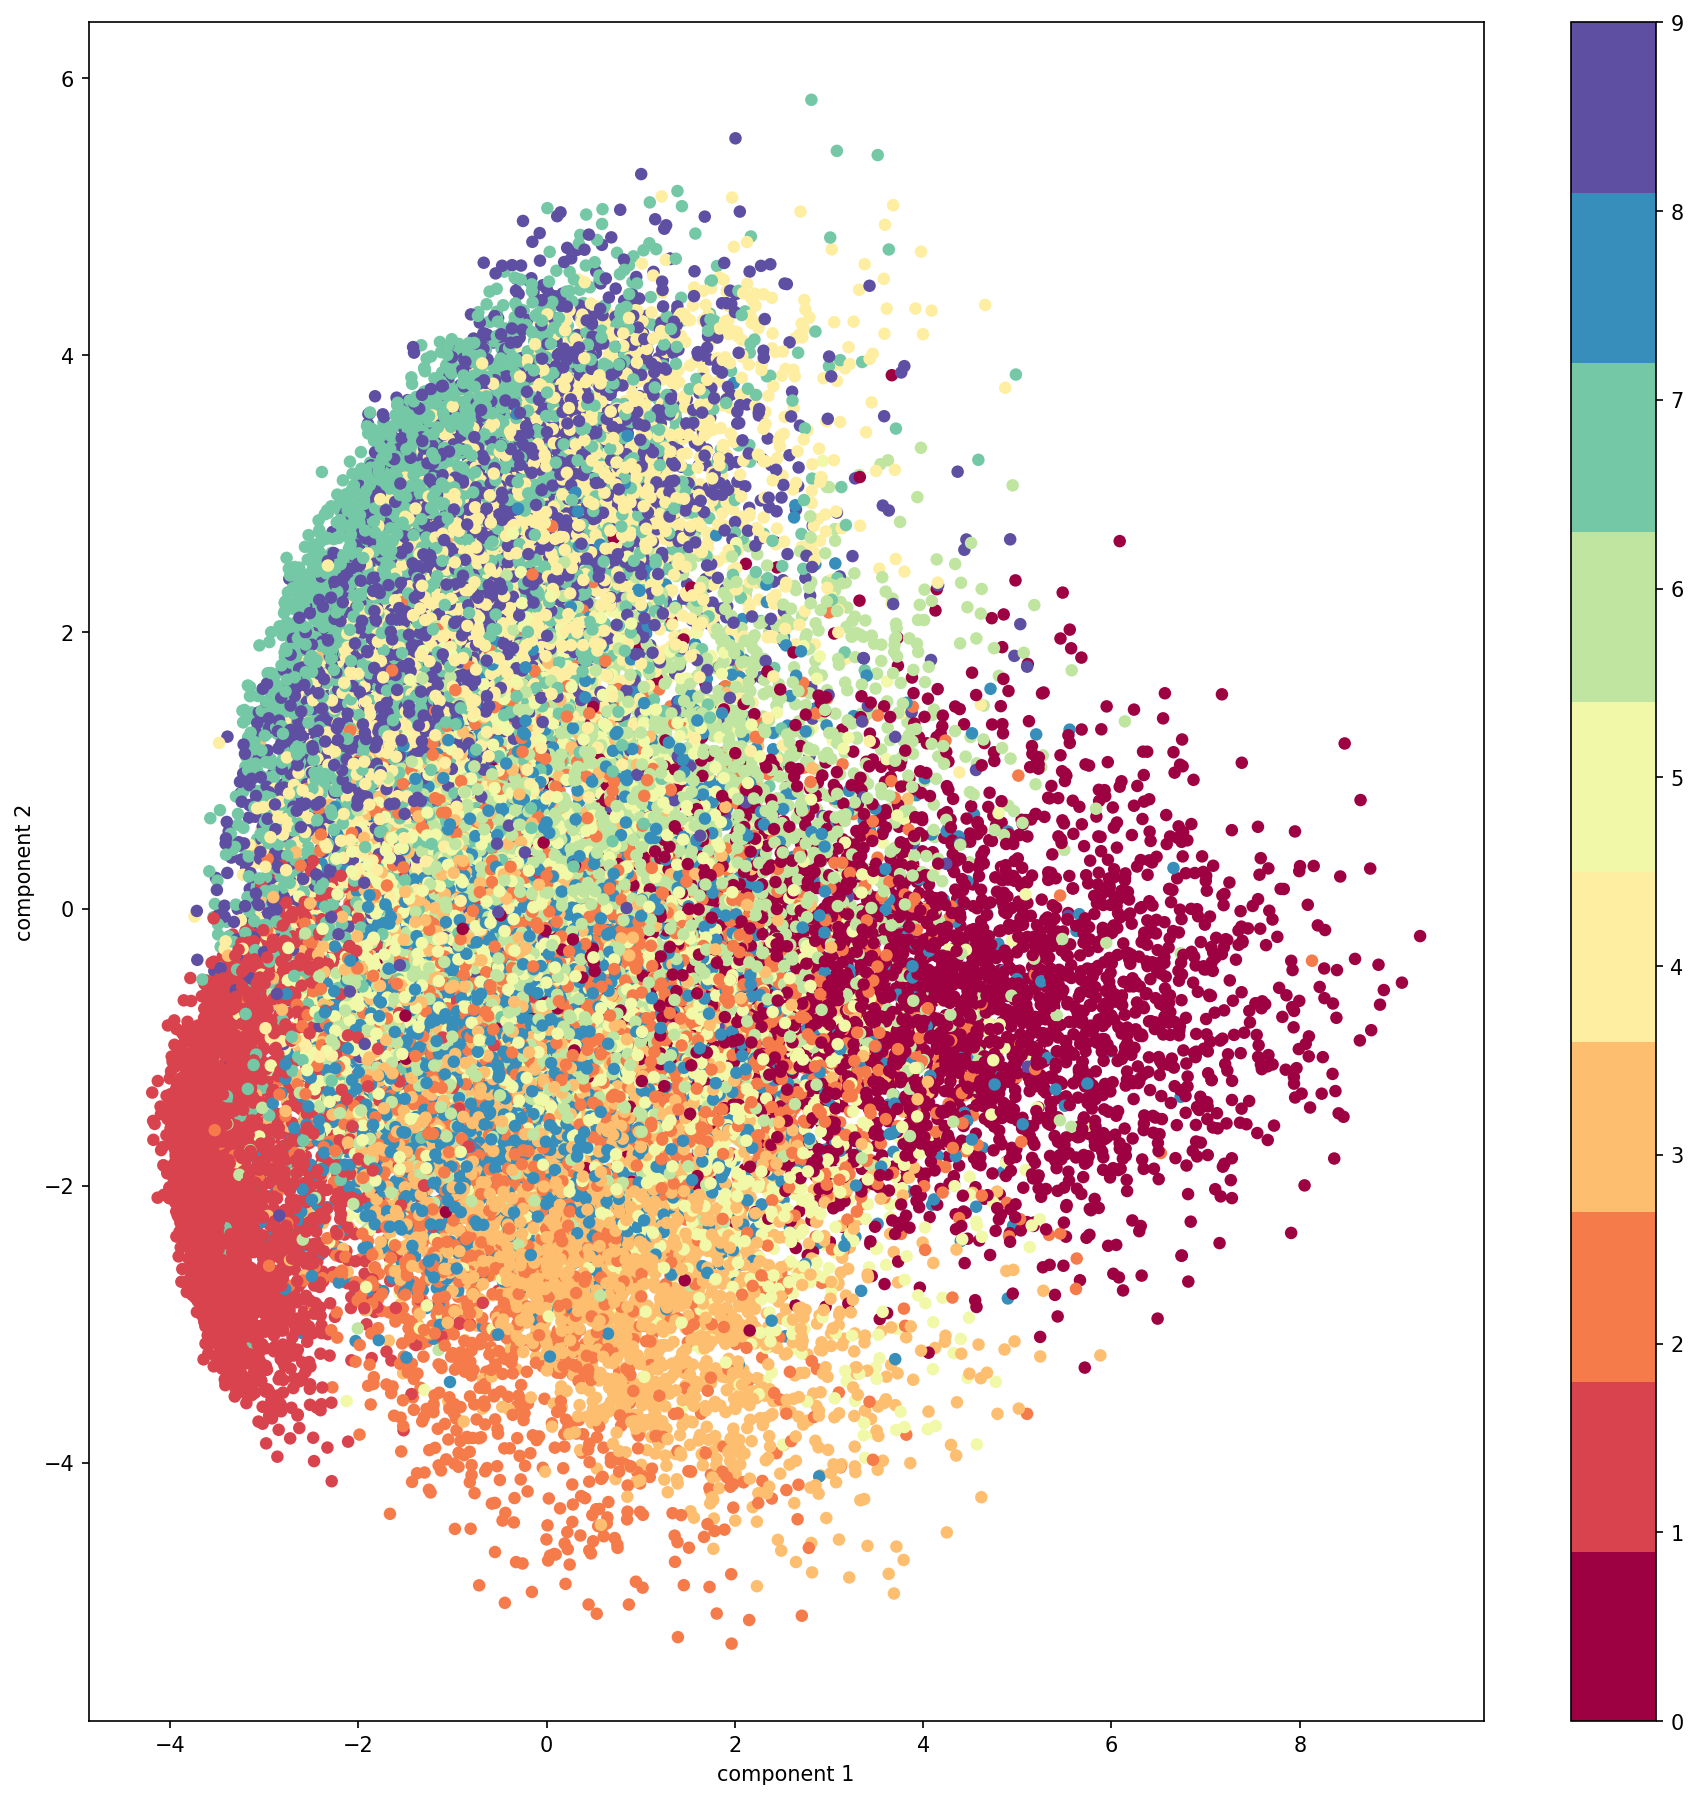

In [15]:
plt.figure(figsize=(15,15), dpi=150)
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, edgecolor='none',
        cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

*Explained Variance Ratio* is the percentage of variance explained by each of the n selected components. The graph shows how much variance is explained with the increase in number of components. If *n_components = dimension of dataset*, we can expect 100% variance. This means (which is obvious) that the selected components completely describe the data without any information loss. Here, we can see that around 100 components, we can expect 90% variance. 

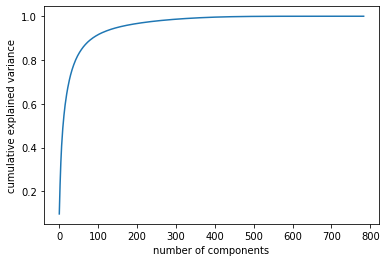

In [15]:
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We will apply PCA with 50%, 75% and 95% variance. For each of the cases, we will use *Inverse Transform* method and try to reconstruct the images and observe how much they visually vary from the original images. This will give us an idea about how difference in variance affect the information of the dataset.

### 50% variance

In [16]:
from sklearn.decomposition import PCA
pca = PCA(0.50)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_train_pca_inverse = pca.inverse_transform(x_train_pca)

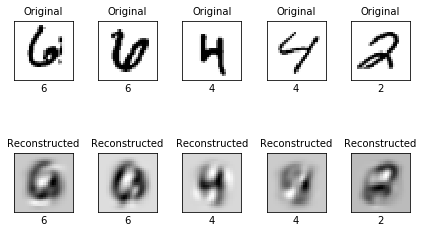

In [17]:
fig, ax = plt.subplots(2, 5)

for i in range(5):
    
    ax[0][i].imshow(x_train[i].reshape(28, 28), cmap='binary')
    ax[0][i].set_xlabel(y_train[i])
    ax[0][i].set(xticks=[], yticks=[])
    ax[0][i].set_title("Original", fontsize=10)

    ax[1][i].imshow(x_train_pca_inverse[i].reshape(28, 28), cmap='binary')
    ax[1][i].set_xlabel(y_train[i])
    ax[1][i].set(xticks=[], yticks=[])
    ax[1][i].set_title("Reconstructed", fontsize=10)

plt.tight_layout()

### 75% variance

In [18]:
from sklearn.decomposition import PCA
pca = PCA(0.75)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_train_pca_inverse = pca.inverse_transform(x_train_pca)

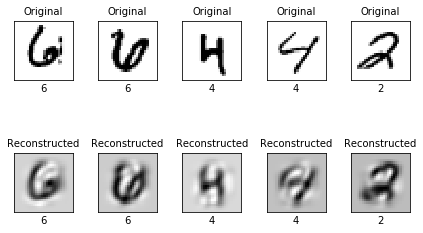

In [19]:
fig, ax = plt.subplots(2, 5)

for i in range(5):
    
    ax[0][i].imshow(x_train[i].reshape(28, 28), cmap='binary')
    ax[0][i].set_xlabel(y_train[i])
    ax[0][i].set(xticks=[], yticks=[])
    ax[0][i].set_title("Original", fontsize=10)

    ax[1][i].imshow(x_train_pca_inverse[i].reshape(28, 28), cmap='binary')
    ax[1][i].set_xlabel(y_train[i])
    ax[1][i].set(xticks=[], yticks=[])
    ax[1][i].set_title("Reconstructed", fontsize=10)

plt.tight_layout()

### 95% variance

In [20]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_train_pca_inverse = pca.inverse_transform(x_train_pca)

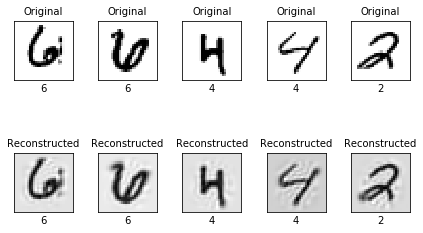

In [21]:
fig, ax = plt.subplots(2, 5)

for i in range(5):
    
    ax[0][i].imshow(x_train[i].reshape(28, 28), cmap='binary')
    ax[0][i].set_xlabel(y_train[i])
    ax[0][i].set(xticks=[], yticks=[])
    ax[0][i].set_title("Original", fontsize=10)

    ax[1][i].imshow(x_train_pca_inverse[i].reshape(28, 28), cmap='binary')
    ax[1][i].set_xlabel(y_train[i])
    ax[1][i].set(xticks=[], yticks=[])
    ax[1][i].set_title("Reconstructed", fontsize=10)

plt.tight_layout()

In [22]:
pca.n_components_

153

From both the **cumulative expected variance ratio** graph and the **reconstructed images**, it is evident that the 95% variance looks good with 784 originals features scaled down to 153. So we will apply PCA with 95% variance to both our validation set and test set.

In [23]:
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(x_test)

We will use various Machine Learning Algorithms on *x_train* (with and without dimensionality reduction method) to train the model and then obtain the accuracy for both the *x_train* and *x_val*. We will also calculate the time taken in training these models. Finally, the models will be evaluated.

## SUPPORT VECTOR MACHINES

### Without Dimensionality Reduction Method

We have picked random hyperparameters for SVM. We tried with the default values, but they reduce the accuracy and increase the training time. A better method of hyperparameter selection would be through GridSearchCV. But due to the large number of datapoints, it takes way more time to determine. Therefore, we resorted to C = 100, and gamma = 0.001.

In [24]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=0.001, kernel='rbf', random_state=0)

In [25]:
time_start = dt.datetime.now()
svc.fit(x_train, y_train)
time_stop = dt.datetime.now()

In [26]:
y_pred_val = svc.predict(x_val)

In [27]:
y_pred_train = svc.predict(x_train)

In [28]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

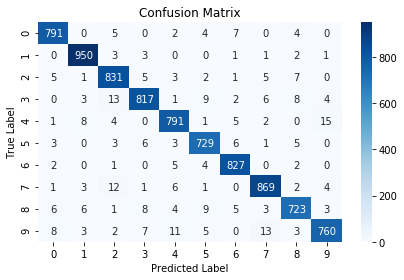

In [29]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()

In [30]:
metrics.accuracy_score(y_val, y_pred_val)

0.9628571428571429

In [31]:
metrics.accuracy_score(y_train, y_pred_train)

0.9911309523809524

In [32]:
time_stop - time_start

datetime.timedelta(seconds=131, microseconds=922292)

In [33]:
y_pred_test = svc.predict(x_test)

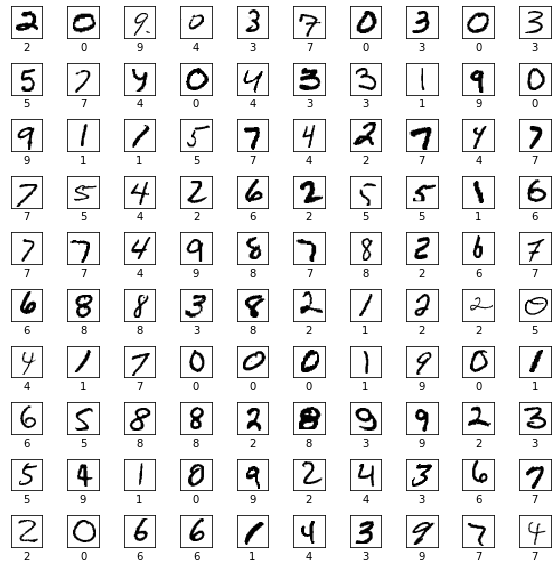

In [34]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 96.28% (Validation), 99.11% (Train)
- Time required: 131 secs

### With Principal Component Analysis

In [35]:
time_start = dt.datetime.now()
svc.fit(x_train_pca, y_train)
time_stop = dt.datetime.now()

In [36]:
y_pred_val = svc.predict(x_val_pca)

In [37]:
y_pred_train = svc.predict(x_train_pca)

In [38]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

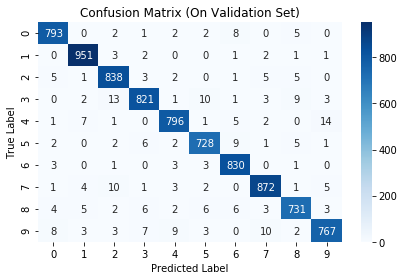

In [39]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation Set)')
plt.tight_layout()

In [40]:
metrics.accuracy_score(y_val, y_pred_val)

0.9675

In [41]:
metrics.accuracy_score(y_train, y_pred_train)

0.985297619047619

In [42]:
time_stop - time_start

datetime.timedelta(seconds=32, microseconds=199908)

In [43]:
y_pred_test = svc.predict(x_test_pca)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

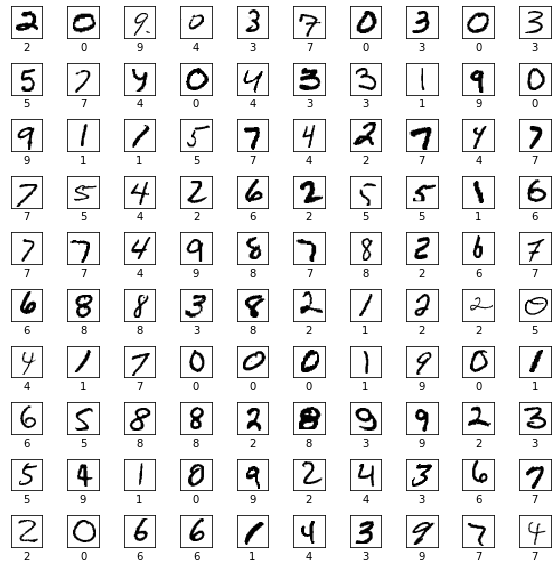

In [44]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 96.75% (Validation), 98.52% (Train)
- Time Required: 32 secs


## RANDOM FOREST CLASSIFIER

### Without Dimensionality Reduction Method

In [45]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=300, random_state=0)

In [46]:
time_start = dt.datetime.now()
random_clf.fit(x_train, y_train)
time_stop = dt.datetime.now()

In [48]:
y_pred_val = random_clf.predict(x_val)

In [50]:
y_pred_train = random_clf.predict(x_train)

In [51]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

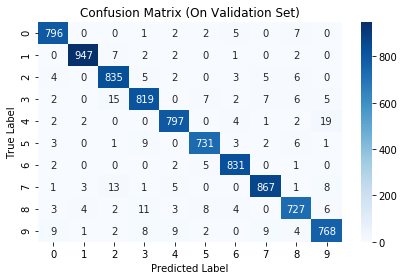

In [55]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation Set)')
plt.tight_layout()

In [56]:
metrics.accuracy_score(y_val, y_pred_val)

0.9664285714285714

In [57]:
metrics.accuracy_score(y_train, y_pred_train)

1.0

In [58]:
time_stop - time_start

datetime.timedelta(seconds=67, microseconds=824626)

In [59]:
y_pred_test = random_clf.predict(x_test)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

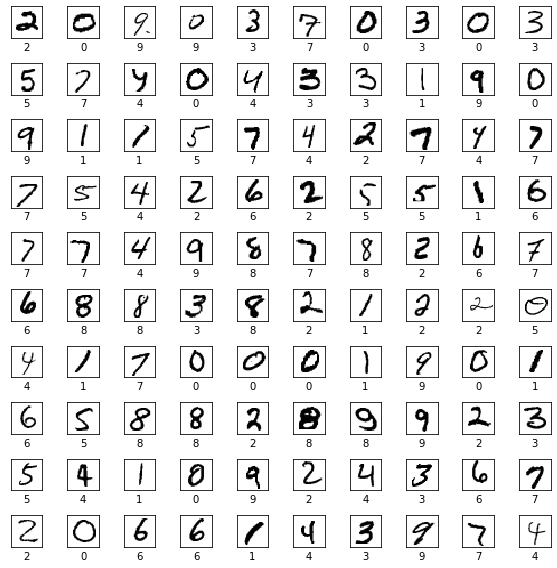

In [61]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 96.64% (Validation), 100% (Train)
- Time taken: 67 seconds

### With Principal Component Analysis

In [62]:
time_start = dt.datetime.now()
random_clf.fit(x_train_pca, y_train)
time_stop = dt.datetime.now()

In [63]:
y_pred_val = random_clf.predict(x_val_pca)

In [64]:
y_pred_train = random_clf.predict(x_train_pca)

In [65]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

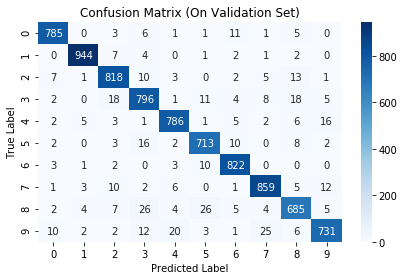

In [66]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation Set)')
plt.tight_layout()

In [67]:
metrics.accuracy_score(y_val, y_pred_val)

0.9451190476190476

In [68]:
metrics.accuracy_score(y_train, y_pred_train)

1.0

In [69]:
time_stop - time_start

datetime.timedelta(seconds=145, microseconds=439153)

In [70]:
y_pred_test = random_clf.predict(x_test_pca)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

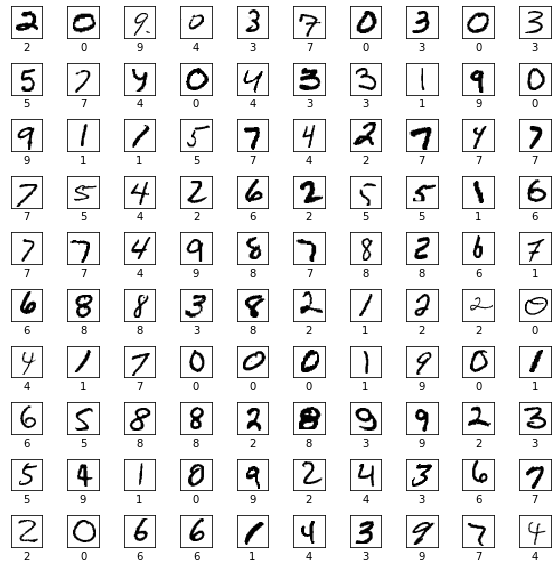

In [71]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 94.5% (Validation), 100% (Train)
- Time Required: 145 secs

## LOGISTIC REGRESSION CLASSIFIER

### Without Dimensionality Reduction Method

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [73]:
time_start = dt.datetime.now()
logreg.fit(x_train, y_train)
time_stop = dt.datetime.now()

C:\Users\Sandeep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandeep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [74]:
y_pred_val = logreg.predict(x_val)

In [75]:
y_pred_train = logreg.predict(x_train)

In [76]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

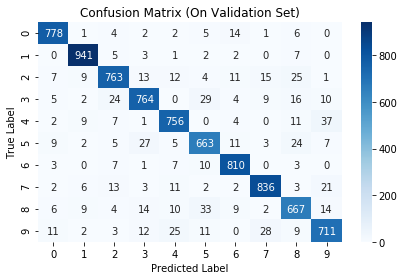

In [78]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation Set)')
plt.tight_layout()

In [79]:
metrics.accuracy_score(y_val, y_pred_val)

0.9153571428571429

In [80]:
metrics.accuracy_score(y_train, y_pred_train)

0.9321130952380953

In [81]:
time_stop - time_start

datetime.timedelta(seconds=33, microseconds=886365)

In [82]:
y_pred_test = logreg.predict(x_test)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

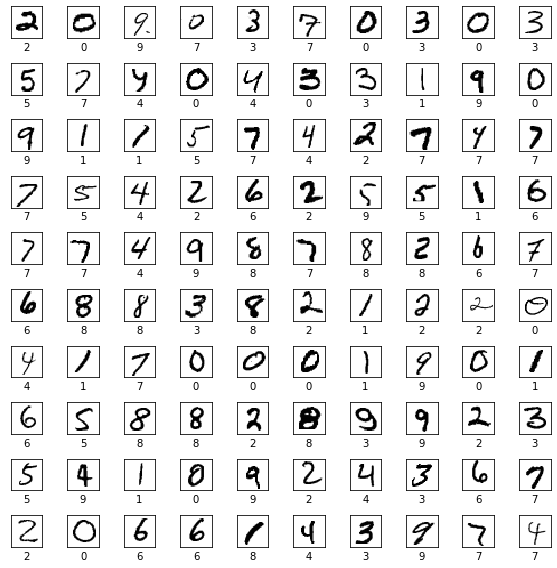

In [83]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 91.53% (Validation), 93.21% (Train)
- Time Required: 33 seconds

### With Principal Component Analysis

In [84]:
time_start = dt.datetime.now()
logreg.fit(x_train_pca, y_train)
time_stop = dt.datetime.now()

C:\Users\Sandeep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sandeep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [85]:
y_pred_val = logreg.predict(x_val_pca)

In [86]:
y_pred_train = logreg.predict(x_train_pca)

In [87]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

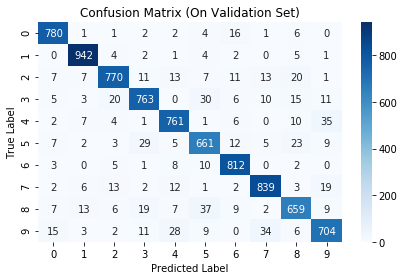

In [88]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation Set)')
plt.tight_layout()

In [89]:
metrics.accuracy_score(y_val, y_pred_val)

0.9155952380952381

In [90]:
metrics.accuracy_score(y_train, y_pred_train)

0.9177083333333333

In [91]:
time_stop - time_start

datetime.timedelta(seconds=28, microseconds=953586)

In [92]:
y_pred_test = logreg.predict(x_test_pca)

Predicted labels for the first 100 samples in the test set (provided in the Kaggle site)

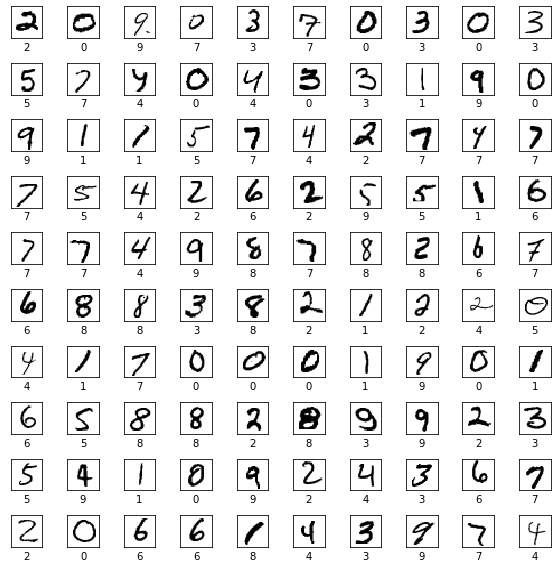

In [94]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 91.55% (Validation), 91.77% (Train)
- Time Required: 28 secs

## XGBoost 

### Without Dimensionality Reduction Method

In [95]:
from xgboost import XGBClassifier

In [96]:
xgb = XGBClassifier()

In [97]:
time_start = dt.datetime.now()
xgb.fit(x_train, y_train)
time_stop = dt.datetime.now()

In [98]:
y_pred_val = xgb.predict(x_val)

In [99]:
y_pred_train = xgb.predict(x_train)

In [100]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

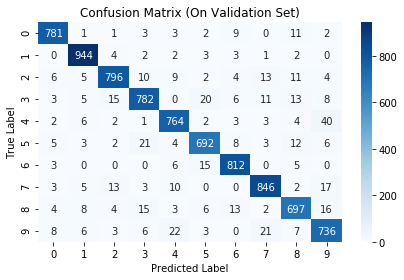

In [101]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation Set)')
plt.tight_layout()

In [102]:
metrics.accuracy_score(y_val, y_pred_val)

0.9345238095238095

In [103]:
metrics.accuracy_score(y_train, y_pred_train)

0.9482440476190476

In [104]:
time_stop - time_start

datetime.timedelta(seconds=429, microseconds=497026)

In [105]:
y_pred_test = xgb.predict(x_test)

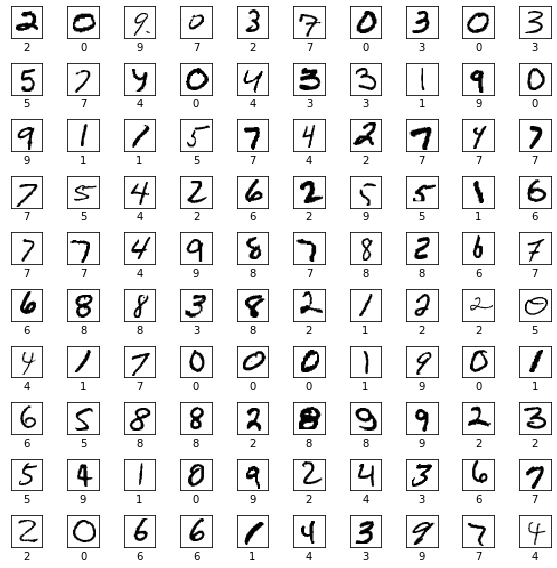

In [106]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()

- Accuracy: 93.45% (Validation), 94.82% (Train)
- Time taken: 429 seconds

### With Principal Component Analysis

In [107]:
time_start = dt.datetime.now()
xgb.fit(x_train_pca, y_train)
time_stop = dt.datetime.now()

In [108]:
y_pred_val = xgb.predict(x_val_pca)

In [109]:
y_pred_train = xgb.predict(x_train_pca)

In [110]:
matrix = metrics.confusion_matrix(y_val, y_pred_val)
matrix_df= pd.DataFrame(matrix, index=[i for i in range(0,matrix.shape[0])], 
                        columns=[i for i in range(0,matrix.shape[0])])

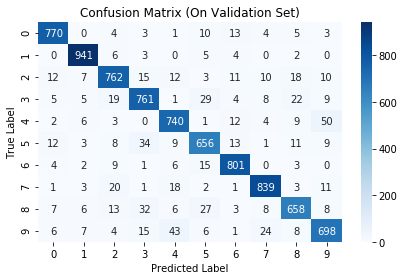

In [111]:
fig = plt.figure()
sns.heatmap(matrix_df, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (On Validation Set)')
plt.tight_layout()

In [112]:
metrics.accuracy_score(y_val, y_pred_val)

0.9078571428571428

In [113]:
metrics.accuracy_score(y_train, y_pred_train)

0.929375

In [114]:
time_stop - time_start

datetime.timedelta(seconds=300, microseconds=239277)

In [115]:
y_pred_test = xgb.predict(x_test_pca)

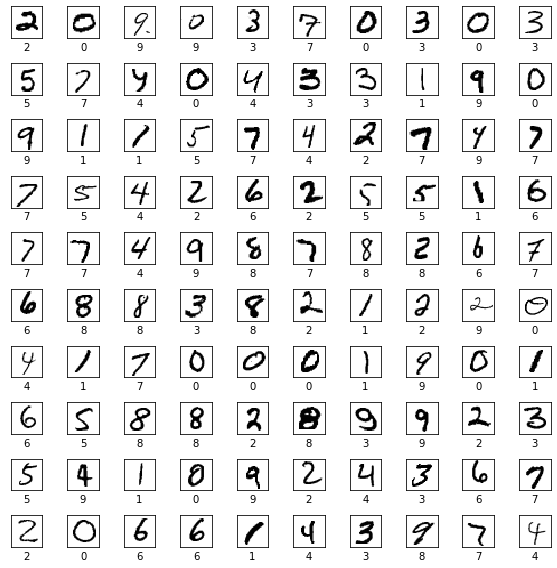

In [116]:
fig, ax = plt.subplots(10, 10, figsize=(8,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28, 28), cmap='binary')
    axi.set_xlabel(y_pred_test[i])
    axi.set(xticks=[], yticks=[])
    
plt.tight_layout()


- Accuracy: 90.78% (Validation), 92.93% (Train)
- Time taken: 300 secs

## MODEL EVALUATION

We have tabulated the Validation Accuracy, Training Accuracy, and Time Taken for each of the Models. Two separate results are obtained - one without dimensionality reduction method and another with it. Various graphs are plotted based on these metrices. We will discuss the result and conclusion separately in the **final report** linked in the Wiki of this repository (https://github.com/pi-by-2/Handwritten-Digit-Recognition/wiki) 

In [42]:
result = pd.read_csv('result.csv')

In [43]:
result

,Models,Validation Accuracy (%),Training Accuracy (%),Time Taken(seconds)
0,SVM,96.28,99.11,131
1,Random Forest,96.64,100.00,67
2,Logistic Regression,91.53,93.21,33
3,XGBoost,93.45,94.82,429


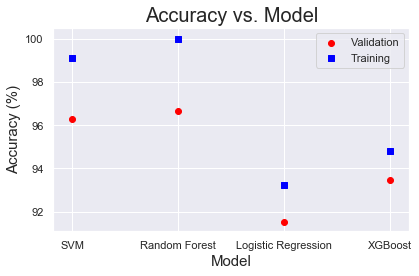

In [44]:
plt.scatter(result.iloc[:,0], result.iloc[:, 1], c='red', marker = 'o', label='Validation')
plt.scatter(result.iloc[:,0], result.iloc[:, 2], c='blue', marker = 's', label='Training')
plt.legend()
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.title('Accuracy vs. Model', fontsize=20)
plt.tight_layout()

In [45]:
result_pca = pd.read_csv('result_pca.csv')

In [46]:
result_pca

,Model,Validation Accuracy (%),Training Accuracy (%),Time Taken (seconds)
0,SVM,96.75,98.52,32
1,Random Forest,94.50,100.00,145
2,Logistic Regression,91.55,91.77,28
3,XGBoost,90.78,92.93,300


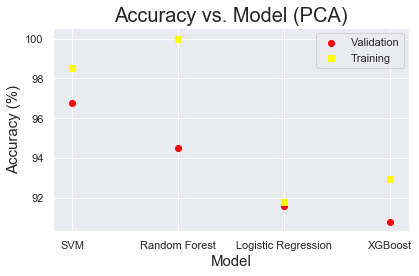

In [59]:
plt.scatter(result_pca.iloc[:,0], result_pca.iloc[:, 1], c='red', marker = 'o', label='Validation')
plt.scatter(result_pca.iloc[:,0], result_pca.iloc[:, 2], c='yellow', marker = 's', label='Training')
plt.legend()
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy (%)', fontsize=15)
plt.title('Accuracy vs. Model (PCA)', fontsize=20)
plt.tight_layout()

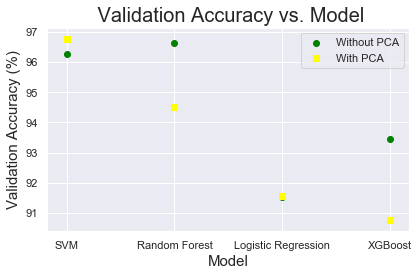

In [58]:
plt.scatter(result.iloc[:,0], result.iloc[:, 1], c='green', marker = 'o', label='Without PCA')
plt.scatter(result.iloc[:,0], result_pca.iloc[:, 1], c='yellow', marker = 's', label='With PCA')
plt.legend()
plt.xlabel('Model', fontsize=15)
plt.ylabel('Validation Accuracy (%)', fontsize=15)
plt.title(' Validation Accuracy vs. Model', fontsize=20)
plt.tight_layout()

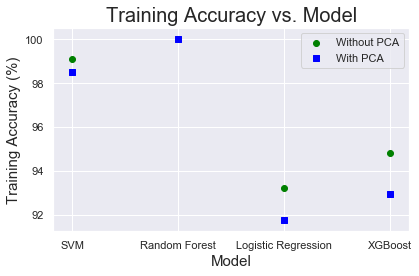

In [56]:
plt.scatter(result.iloc[:,0], result.iloc[:, 2], c='green', marker = 'o', label='Without PCA')
plt.scatter(result.iloc[:,0], result_pca.iloc[:, 2], c='blue', marker = 's', label='With PCA')
plt.legend()
plt.xlabel('Model', fontsize=15)
plt.ylabel('Training Accuracy (%)', fontsize=15)
plt.title('Training Accuracy vs. Model', fontsize=20)
plt.tight_layout()

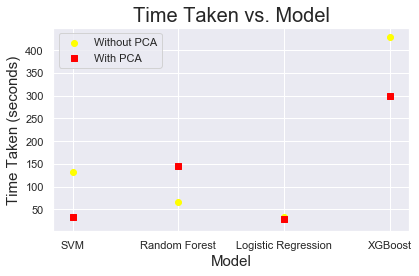

In [57]:
plt.scatter(result.iloc[:,0], result.iloc[:, 3], c='yellow', marker = 'o', label='Without PCA')
plt.scatter(result.iloc[:,0], result_pca.iloc[:, 3], c='red', marker = 's', label='With PCA')
plt.legend()
plt.xlabel('Model', fontsize=15)
plt.ylabel('Time Taken (seconds)', fontsize=15)
plt.title('Time Taken vs. Model', fontsize=20)
plt.tight_layout()